In [1]:
import numpy as np
np.set_printoptions(precision=30)
import matplotlib.pyplot as plt

In [2]:
max_num_iterations = 100000
p_h = 0.55
theta = 0.0000000000000000000000000000001
S = range(1, 100)
V = np.zeros(101)
V[100] = 1
V_history = []

In [3]:
for i in range(max_num_iterations):
    delta = 0
    for s in S:
        v = V[s]
        A = np.arange(1, min(s, 100 - s) + 1)
        V[s] = np.max((1 - p_h) * V[s - A] + p_h * V[s + A])
        delta = max(delta, abs(v - V[s]))
    if delta < theta:
        break
    V_history.append(V.copy())
print("Num iterations:", i + 1)

Num iterations: 3028


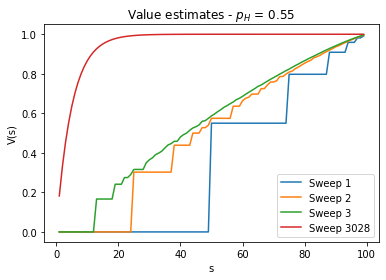

In [4]:
plt.plot(S, V_history[0][1:100], label="Sweep 1")
plt.plot(S, V_history[1][1:100], label="Sweep 2")
plt.plot(S, V_history[2][1:100], label="Sweep 3")
plt.plot(S, V_history[-1][1:100], label=f"Sweep {len(V_history) + 1}")
plt.title(f"Value estimates - $p_H$ = {p_h}")
plt.xlabel("s")
plt.ylabel("V(s)")
plt.legend()
plt.savefig(f"value_estimates_p_h_{str(p_h).replace('.', '')}.png", facecolor="white", transparent=False)

In [5]:
pi = np.zeros(len(S))
for s in S:
    A = np.arange(1, min(s, 100 - s) + 1)
    pi[s - 1] = np.argmax((1 - p_h) * V[s - A] + p_h * V[s + A]) + 1

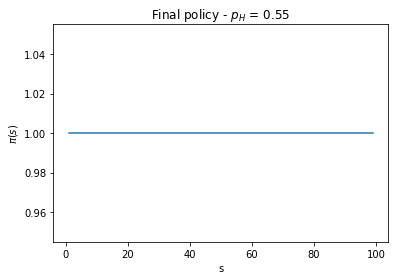

In [6]:
plt.plot(S, pi)
plt.title(f"Final policy - $p_H$ = {p_h}")
plt.xlabel("s")
plt.ylabel("$\pi(s)$")
plt.savefig(f"final_policy_p_h_{str(p_h).replace('.', '')}.png", facecolor="white", transparent=False)

In [7]:
s = 16
A = np.arange(1, min(s, 100 - s) + 1)
print((1 - p_h) * V[s - A] + p_h * V[s + A])
print(np.argmax((1 - p_h) * V[s - A] + p_h * V[s + A]) + 1)
print(np.max((1 - p_h) * V[s - A] + p_h * V[s + A]))

[0.9596728836195221 0.9580435051020322 0.954718914591598
 0.9495647851989091 0.9423728692717359 0.9328525843483741
 0.9206192724521224 0.9051786583548493 0.8859068788607055
 0.8620252762123517 0.8325689371714706 0.7963477066252993
 0.7518981005113661 0.6974241751483001 0.6307249638547652
 0.5491055490027398]
1
0.9596728836195221
